In [98]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
sns.set_style()

In [99]:
import statsmodels
statsmodels.__version__

'0.13.2'

# Data Preprocessing

In [100]:
df = pd.read_csv("Data Analyst -- Case Study -- Data.csv")

In [101]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [114]:
EW1 = df[df["warehouse"] == 'EW1']
EW2 = df[df['warehouse'] == 'EW2']
print(f"EW1: {len(EW1)} and EW2 {len(EW2)}")

EW1: 90 and EW2 55


In [104]:
EW1.drop(['warehouse'], axis = 1, inplace = True) 
EW2.drop(['warehouse'], axis = 1, inplace = True) 

C:\Users\Anas\AppData\Local\Temp\ipykernel_4924\2795741996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EW1.drop(['warehouse'], axis = 1, inplace = True)
C:\Users\Anas\AppData\Local\Temp\ipykernel_4924\2795741996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EW2.drop(['warehouse'], axis = 1, inplace = True)


<AxesSubplot:xlabel='date'>

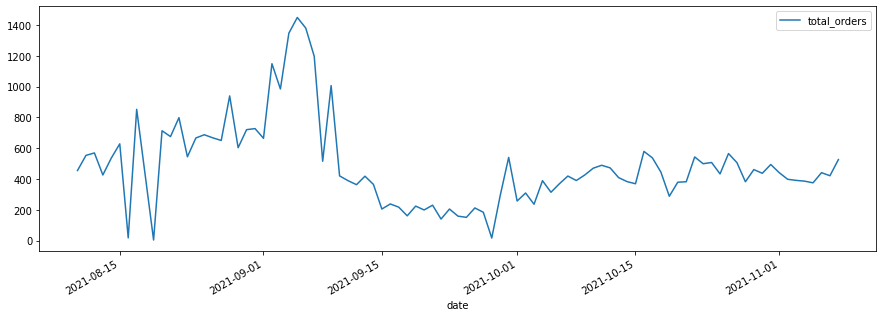

In [111]:
EW1.plot(figsize=(15,5))

<AxesSubplot:xlabel='date'>

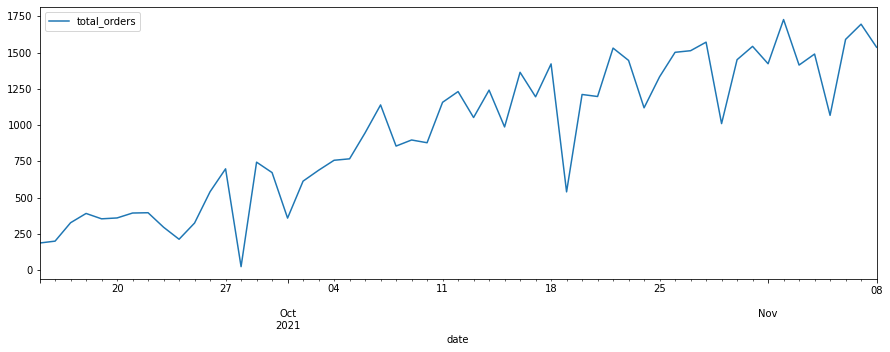

In [112]:
EW2.plot(figsize=(15,5))

# Stationarity of Data

In [50]:
from statsmodels.tsa.stattools import adfuller

# H0 -> data is non-stationary
# H1 -> data is stationary

def adfuller_test(orders):
    result = adfuller(orders)
    labels=["ADF Test Statistic", "p-value", "Num of Lag Used", "Num of Observation"]
    for value,label in zip(result,labels):
        print(f"{label}:{value}")
    if result[1] <= 0.05:
        print('rejecting null hypothesis. Data is stationary')
    else:
        print('could not reject null hypothesis. Data is not stationary')

In [51]:
# for EW1
adfuller_test(EW1['total_orders'])

ADF Test Statistic:-2.0679368385438406
p-value:0.2576012144502858
Num of Lag Used:1
Num of Observation:88
could not reject null hypothesis. Data is not stationary


In [52]:
# for EW2
adfuller_test(EW2['total_orders'])

ADF Test Statistic:-0.925021588721528
p-value:0.7796208214580406
Num of Lag Used:4
Num of Observation:50
could not reject null hypothesis. Data is not stationary


# Differencing 

In [53]:
EW2["2-day lag"] = EW2['total_orders'] - EW2['total_orders'].shift(2)
adfuller_test(EW2['2-day lag'].dropna())

ADF Test Statistic:-3.1503378831113458
p-value:0.02304537188977249
Num of Lag Used:7
Num of Observation:45
rejecting null hypothesis. Data is stationary


C:\Users\Anas\AppData\Local\Temp\ipykernel_4924\1477413955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EW2["2-day lag"] = EW2['total_orders'] - EW2['total_orders'].shift(2)


In [54]:
EW1["2-days lag"] = EW1['total_orders'] - EW1['total_orders'].shift(2)
adfuller_test(EW1['2-days lag'].dropna())

ADF Test Statistic:-3.7238551669761266
p-value:0.003789851044828966
Num of Lag Used:7
Num of Observation:80
rejecting null hypothesis. Data is stationary


C:\Users\Anas\AppData\Local\Temp\ipykernel_4924\2289848149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EW1["2-days lag"] = EW1['total_orders'] - EW1['total_orders'].shift(2)


# Differencing and ACF GRAPH

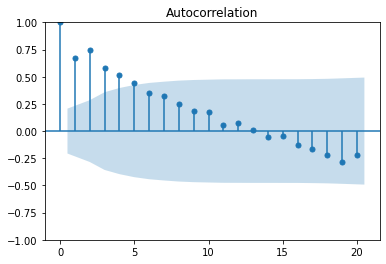

In [55]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(EW1["total_orders"])
plt.show()

C:\Users\Anas\AppData\Local\Temp\ipykernel_4924\43846557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EW1['1-day diff'] = EW1['total_orders'] - EW1["total_orders"].shift(1)


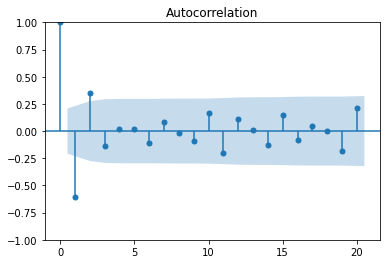

In [56]:
# first order differencing
EW1['1-day diff'] = EW1['total_orders'] - EW1["total_orders"].shift(1)
plot_acf(EW1["1-day diff"].dropna())
plt.show()

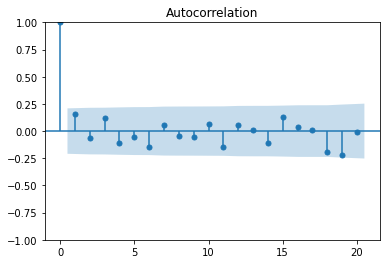

In [57]:
# second order differencing
plot_acf(EW1["2-days lag"].dropna())
plt.show()

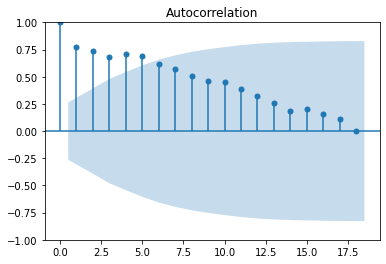

In [58]:
plot_acf(EW2["total_orders"])
plt.show()

C:\Users\Anas\AppData\Local\Temp\ipykernel_4924\913590199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EW2['1-day diff'] = EW2['total_orders'] - EW2["total_orders"].shift(1)


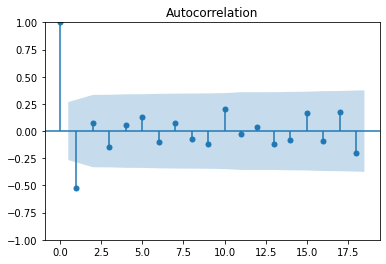

In [59]:
EW2['1-day diff'] = EW2['total_orders'] - EW2["total_orders"].shift(1)
plot_acf(EW2["1-day diff"].dropna())
plt.show()

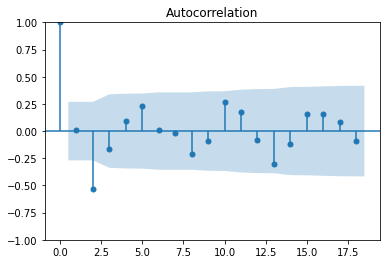

In [60]:
# second order differencing
plot_acf(EW2["2-day lag"].dropna())
plt.show()

In [61]:
# the 2 level of differencing is chosen

# PACF for AR Term

C:\Users\Anas\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


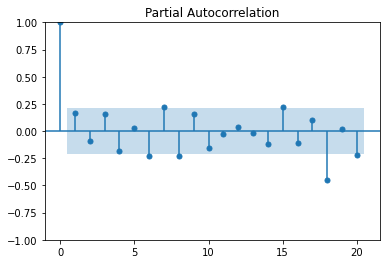

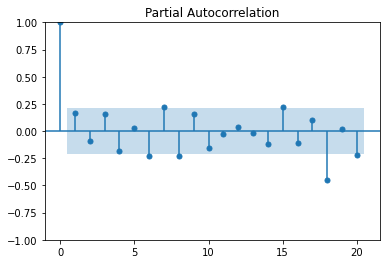

In [62]:
plot_pacf(EW1["2-days lag"].dropna())

# EW1--> AR = p = 0

C:\Users\Anas\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


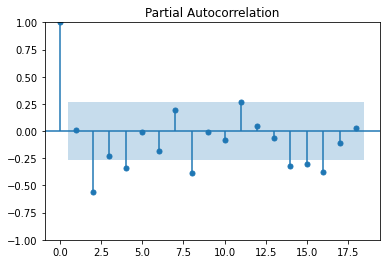

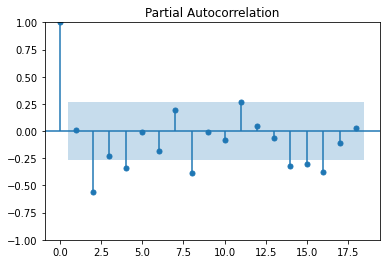

In [63]:
plot_pacf(EW2["2-day lag"].dropna())
# EW2 --> AR = p =  0

# ACF PLOT OF MA (q)

In [64]:
#  0 0 

# Modelling for Warehouse EW1

In [93]:
from statsmodels.tsa.arima.model import ARIMA
# model = ARIMA(EW1['total_orders'], order=(0,0,2))
model = ARIMA(EW1['total_orders'], order=(0,1,2))
model_fit1 = model.fit()
model_fit1.summary()

C:\Users\Anas\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Anas\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Anas\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           total_orders   No. Observations:                   90
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -589.980
Date:                Sun, 13 Mar 2022   AIC                           1185.961
Time:                        19:17:14   BIC                           1193.427
Sample:                             0   HQIC                          1188.970
                                 - 90                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5727      0.077     -7.398      0.000      -0.724      -0.421
ma.L2          0.3466      0.081      4.276      0.000       0.188       0.505
sigma2      3.334e+04   2956.837     11.277      0.000    2.75e+04    3.91e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                92.64
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                            -0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\Anas\AppData\Local\Temp\ipykernel_4924\1080230536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EW1['forecast'] = model_fit1.predict()


<AxesSubplot:xlabel='date'>

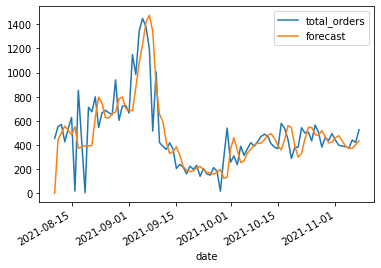

In [95]:
EW1['forecast'] = model_fit1.predict()

EW1[['total_orders', 'forecast']].plot()

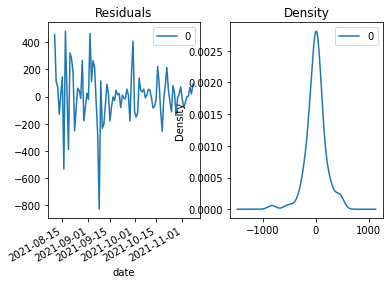

In [30]:
residuals = pd.DataFrame(model_fit1.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [96]:
model = ARIMA(EW2['total_orders'], order=(0,0,2))
model_fit2 = model.fit()
model_fit2.summary()

C:\Users\Anas\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Anas\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Anas\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           total_orders   No. Observations:                   55
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -395.272
Date:                Sun, 13 Mar 2022   AIC                            798.544
Time:                        19:18:14   BIC                            806.573
Sample:                    09-15-2021   HQIC                           801.649
                         - 11-08-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        954.9750     99.982      9.551      0.000     759.014    1150.937
ma.L1          0.6534      0.149      4.388      0.000       0.362       0.945
ma.L2          0.5267      0.133      3.954      0.000       0.266       0.788
sigma2      1.007e+05   2.16e+04      4.668      0.000    5.84e+04    1.43e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):                 1.35
Prob(Q):                              0.38   Prob(JB):                         0.51
Heteroskedasticity (H):               0.69   Skew:                            -0.38
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\Anas\AppData\Local\Temp\ipykernel_10472\1622433291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EW2["forecast"] = model_fit2.predict()


<AxesSubplot:xlabel='date'>

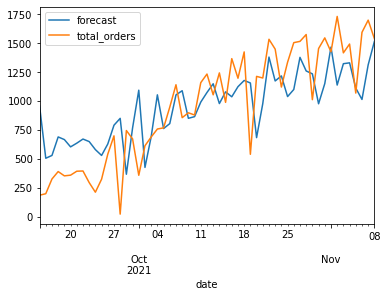

In [33]:
EW2["forecast"] = model_fit2.predict()
EW2[["forecast", "total_orders"]].plot()


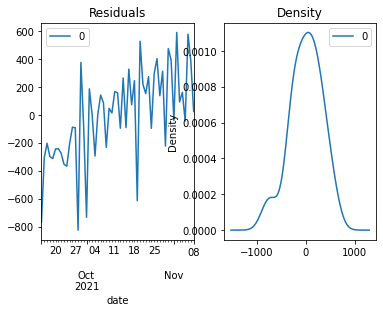

In [38]:
residuals = pd.DataFrame(model_fit2.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [97]:
EW2.head()

,total_orders,2-day lag,1-day diff
date,,,
2021-09-15,186,NaN,NaN
2021-09-16,199,NaN,13.0
2021-09-17,326,140.0,127.0
2021-09-18,390,191.0,64.0
2021-09-19,353,27.0,-37.0


# AutoArmina Model For Cross-validation of p,d,q

In [40]:
from pmdarima import auto_arima

In [41]:
stepwise_fit = auto_arima(EW2["total_orders"], trace=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=770.172, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=754.689, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=737.479, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=768.568, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=739.087, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=739.013, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=746.168, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.553 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   55
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -365.740
Date:                Sun, 13 Mar 2022   AIC                            737.479
Time:                        18:04:39   BIC                            743.446
Sample:                             0   HQIC                           739.781
                                 - 55                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     26.4044      4.647      5.682      0.000      17.297      35.512
ma.L1         -0.9001      0.074    -12.203      0.000      -1.045      -0.756
sigma2       4.34e+04   8153.581      5.323      0.000    2.74e+04    5.94e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):                25.29
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               1.50   Skew:                            -1.30
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""